In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
online_food = pd.read_csv('onlinefoods.csv')

In [4]:
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
online_food.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [6]:
online_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [7]:
online_food.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0000,23.000000,24.0000,26.000000,33.0000
Family size,388.0,3.280928,1.351025,1.0000,2.000000,3.0000,4.000000,6.0000
latitude,388.0,12.972058,0.044489,12.8652,12.936900,12.9770,12.997025,13.1020
longitude,388.0,77.600160,0.051354,77.4842,77.565275,77.5921,77.630900,77.7582
Pin code,388.0,560040.113402,31.399609,560001.0000,560010.750000,560033.5000,560068.000000,560109.0000


In [8]:
online_food.describe(include='object')

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback,Unnamed: 12
count,388,388,388,388,388,388,388,388
unique,2,3,4,5,5,2,2,2
top,Male,Single,Student,No Income,Graduate,Yes,Positive,Yes
freq,222,268,207,187,177,301,317,301


In [21]:
counts=online_food.Gender.value_counts()
counts

Gender
Male      222
Female    166
Name: count, dtype: int64

<Axes: title={'center': 'Female vs Male'}, xlabel='Gender', ylabel='count'>

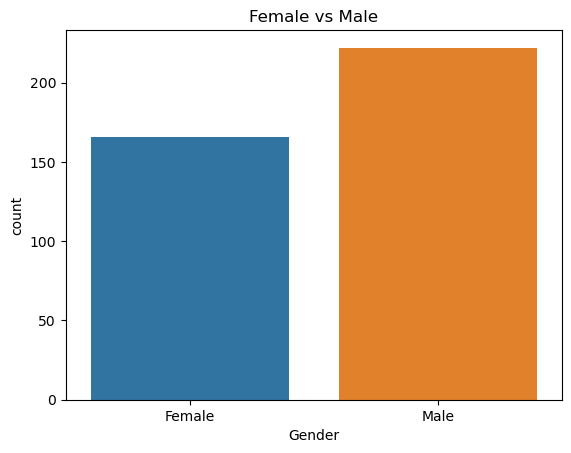

In [18]:
plt.title('Female vs Male')
sns.countplot(x='Gender', data=online_food)

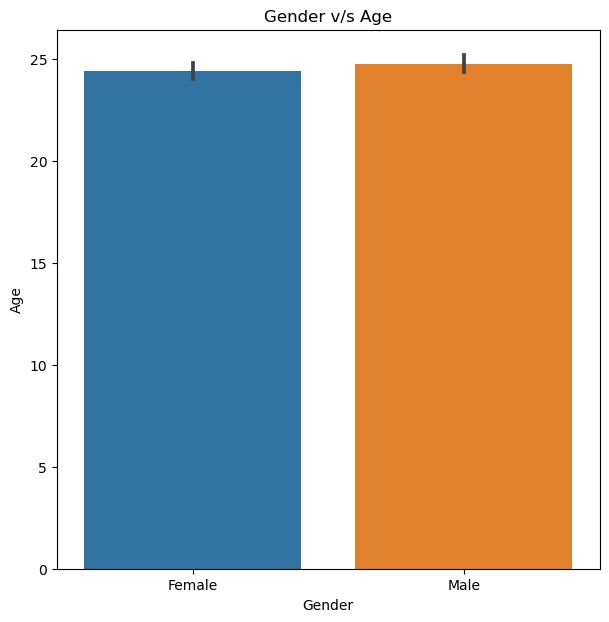

In [20]:
plt.figure(figsize=(7,7))
plt.title("Gender v/s Age")
sns.barplot(x = 'Gender',
            y = 'Age',
            data = online_food);

NUMERIC

In [22]:
online_food.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [23]:
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

In [25]:
data_scaled = online_food.copy()

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [33]:
standard_scaler = StandardScaler()
data_scaled[numerical_features] = standard_scaler.fit_transform(online_food[numerical_features])

In [34]:
print("\nHasil Standard Scaling:")
print(data_scaled[numerical_features].head())


Hasil Standard Scaling:
        Age  Family size  latitude  longitude  Pin code
0 -1.557620     0.532929  0.102224  -0.016759 -1.247274
1 -0.211614    -0.208205  0.111227  -0.445712 -0.992164
2 -0.884617    -0.208205 -0.381663   1.153112 -0.737055
3 -0.884617     2.015198 -0.557212  -0.751828 -0.673278
4 -0.884617     0.532929  0.291278  -0.913660 -0.960276


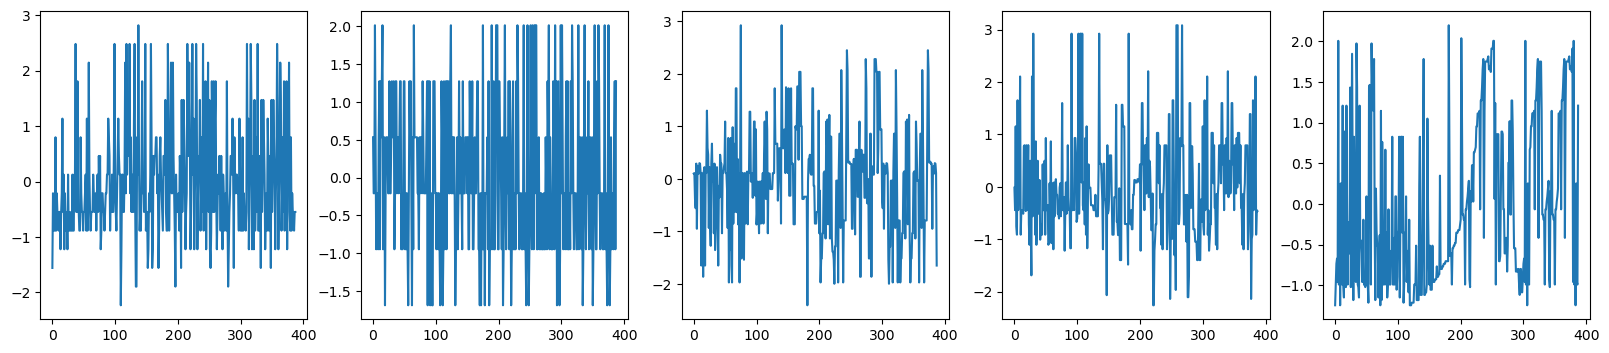

In [35]:
fig,axs = plt.subplots(1,5,figsize=(20,4))
for x,y in enumerate(data_scaled[numerical_features]):
    axs[x].plot(data_scaled[numerical_features][y])

KATEGORIKAL

In [56]:
onlinefood_new = online_food.select_dtypes(include=['object']).copy()
nRows, nCols = onlinefood_new.shape
for myIndex in range(0,nCols):
    headerName = onlinefood_new.columns[myIndex]
    onlinefood_new[headerName] = onlinefood_new[headerName].astype("category")
    onlinefood_new[headerName] = onlinefood_new[headerName].cat.codes
    online_food[headerName] = onlinefood_new[headerName]
onlinefood_numeric = online_food
onlinefood_numeric.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1


DECISSION TREE

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
le = LabelEncoder()
online_food['Gender'] = le.fit_transform(online_food['Gender'])

In [41]:
X = online_food[['Gender']]  
y = online_food['Age'] 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
y_pred = regressor.predict(X_test)

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2.2062055350690946
Mean Squared Error (MSE): 8.371721726550728
R^2 Score: -0.04063072039984128


In [50]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

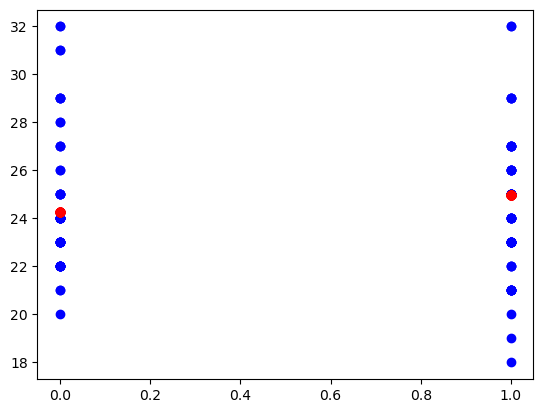

In [51]:
plt.scatter(X_test, y_test, color='blue', label='Actual Age')
plt.scatter(X_test, y_pred, color='red', label='Predicted Age')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


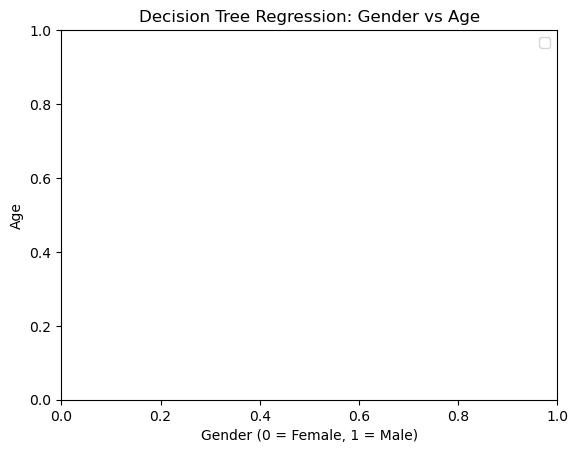

In [52]:
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.title('Decision Tree Regression: Gender vs Age')
plt.legend()

In [54]:
plt.show()

DECISSION TREE 2

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19888\2208110172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(online_food['Gender'])
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Density'>

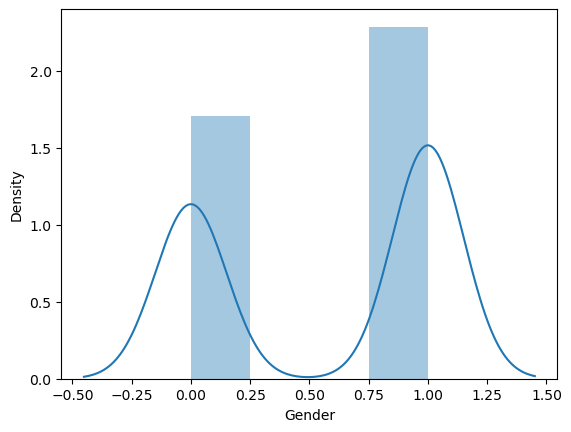

In [58]:
sns.distplot(online_food['Gender'])

In [59]:
le = LabelEncoder()
online_food['Gender']= le.fit_transform(online_food['Gender'])

<Axes: >

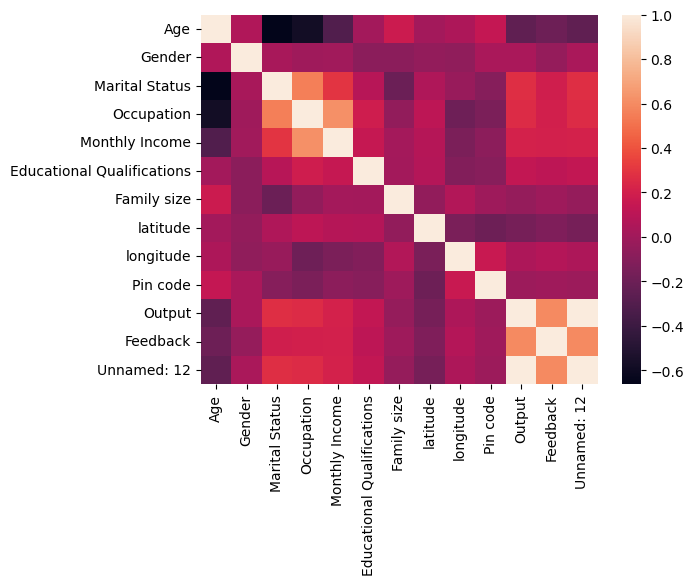

In [61]:
online_food.corr()
sns.heatmap(online_food.corr())

In [62]:
X = online_food.iloc[:, :-1].values
y = online_food.iloc[:, -1].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [66]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [67]:
accuracy_score(y_test, y_pred)

1.0

In [68]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        78

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



In [69]:
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 1.0


<Axes: >

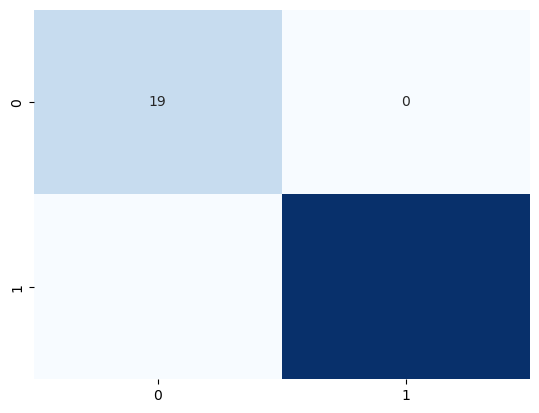

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

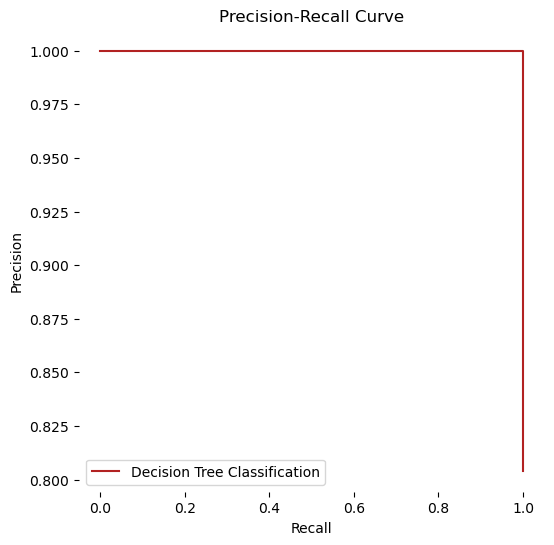

In [71]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

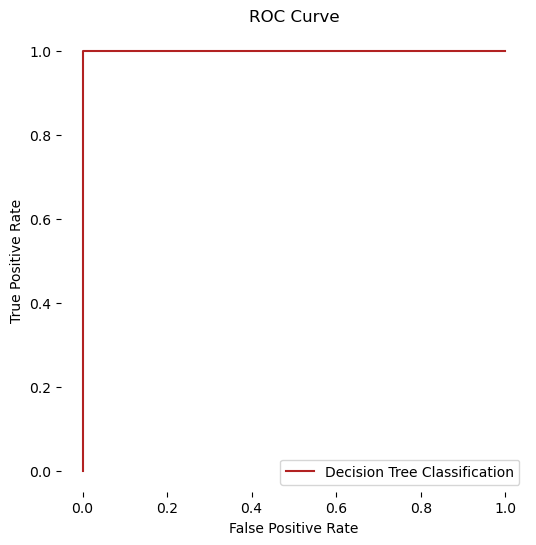

In [72]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();